In [1]:
# import library
import numpy as np
import pandas as pd
import itertools
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
#Read the data
df=pd.read_csv('C:\\Users\\Vipul Singh\\Downloads\\news.csv')

#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
# Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [4]:
# Split the dataset
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.2, random_state=7)

In [5]:
#DataFlair - Initialize a TfidfVectorizer
cv=CountVectorizer(stop_words='english', max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
train=cv.fit_transform(x_train) 
test=cv.transform(x_test)

## Passive Aggressive Classifier

In [6]:
# Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(train,y_train)

# Predict on the test set and calculate accuracy
y_pred_pac=pac.predict(test)
score_pac=accuracy_score(y_test,y_pred_pac)
print(f'Accuracy: {round(score_pac*100,2)}%')

Accuracy: 90.77%


In [7]:
# Build confusion matrix
confusion_matrix(y_test,y_pred_pac, labels=['FAKE','REAL'])

array([[566,  72],
       [ 45, 584]], dtype=int64)

## Random Forest

In [8]:
# Create the model with 100 trees
rf = RandomForestClassifier(n_estimators=100, 
                               bootstrap = True,
                               max_features = 'sqrt')

# Fit on training data
rf.fit(train,y_train)


# predict test data
y_pred_rf = rf.predict(test)

# print accuracy
score_rf=accuracy_score(y_test,y_pred_rf)
print(f'Accuracy: {round(score_rf*100,2)}%')

Accuracy: 89.9%


In [9]:
# Build confusion matrix
confusion_matrix(y_test,y_pred_rf, labels=['FAKE','REAL'])

array([[566,  72],
       [ 56, 573]], dtype=int64)

## Logistic Regression

In [10]:
# initialise Logistic Regression
lr = LogisticRegression(C=1000, random_state=42, max_iter = 300)

# Fit on training data
lr.fit(train,y_train)

# predict test data
y_pred_lr = lr.predict(test)

# print accuracy
score_lr=accuracy_score(y_test,y_pred_lr)
print(f'Accuracy: {round(score_lr*100,5)}%')

Accuracy: 89.8974%


In [11]:
# Build confusion matrix
confusion_matrix(y_test,y_pred_lr, labels=['FAKE','REAL'])

array([[573,  65],
       [ 63, 566]], dtype=int64)

## Xgboost

In [12]:
y_train.replace(['FAKE', 'REAL'], [0,1], inplace = True)
y_test.replace(['FAKE', 'REAL'], [0,1], inplace = True)


In [13]:
xg_clf = xgboost.XGBClassifier(objective="binary:logistic",random_state = 42)
xg_clf.fit(train, y_train.values)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [14]:
# predict test data
y_pred_xg = xg_clf.predict(test)

# print accuracy
score_xg=accuracy_score(y_test,y_pred_xg)
print(f'Accuracy: {round(score_xg*100,5)}%')

Accuracy: 91.23915%


<AxesSubplot:>

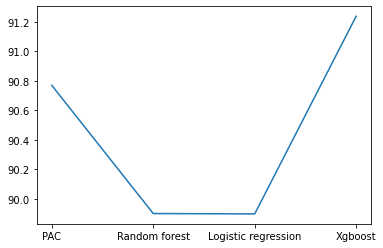

In [26]:
# accuracy plot
import matplotlib.pyplot as plt
import seaborn as sns
x = ["PAC", "Random forest", "Logistic regression", 'Xgboost']
y = [round(score_pac*100,2), round(score_rf*100,2), round(score_lr*100,5), round(score_xg*100,5)]
sns.lineplot(x=x, y=y)

#### Here Xgboost perform better